# Thompson Sampling

In [1]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# not sure which ad to use on social network 
# find ad with highest ctr (click through rate)
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


1. At each round n, consider two numbers for each ad i: 
    - N_i(n): Number of times ad i was selected up to round n
    - R_i(n): sum of rewards the ad i up to round n
2. For each ad i, we take a random draw from the distribution 
$$ 
\theta_i(n)= \beta(N_i^1(n)+1, N_i^0(n)+1)
$$
3. Select the ad that has highest theta_i

In [6]:
# To run in python 2, make sure the math functions are correct
import random
N = 10000
d = 10
ads_selected = []
# replace with N_i(n) and R_i(n) for Thompson Sampling
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        # Thompson Sampling - take random draws of beta distribution, each time take random draw, check if higher than max random
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        if random_beta > max_random:
            # keep track of which ad for new max_upper_bound
            max_random = random_beta
            ad = i
    # update that ad i was selected
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1: 
        number_of_rewards_1[ad]+=1
    else: 
        number_of_rewards_0[ad]+=1
    total_reward = total_reward + reward

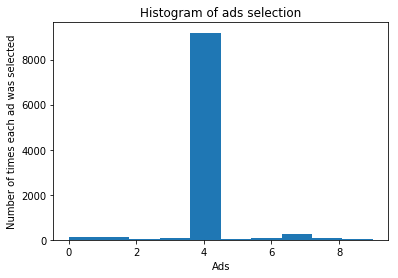

In [7]:
# visulizing results
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()